In [277]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import imblearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
DATA_DIR = "data"

In [5]:
raw_df = pd.read_csv(f"{DATA_DIR}/creditcard.csv")
print(raw_df.shape)
raw_df.head(2)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


# EDA

In [8]:
raw_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
raw_df[raw_df.duplicated()].shape

(1081, 31)

In [11]:
data = raw_df.drop_duplicates().reset_index(drop=True)
data.shape

(283726, 31)

In [31]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [185]:
X = data.drop(columns=['Class'])
y = data['Class']

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>],
       [<AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>],
       [<AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>],
       [<AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>],
       [<AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>],
       [<AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>],
       [<AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>],
       [<AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'cen

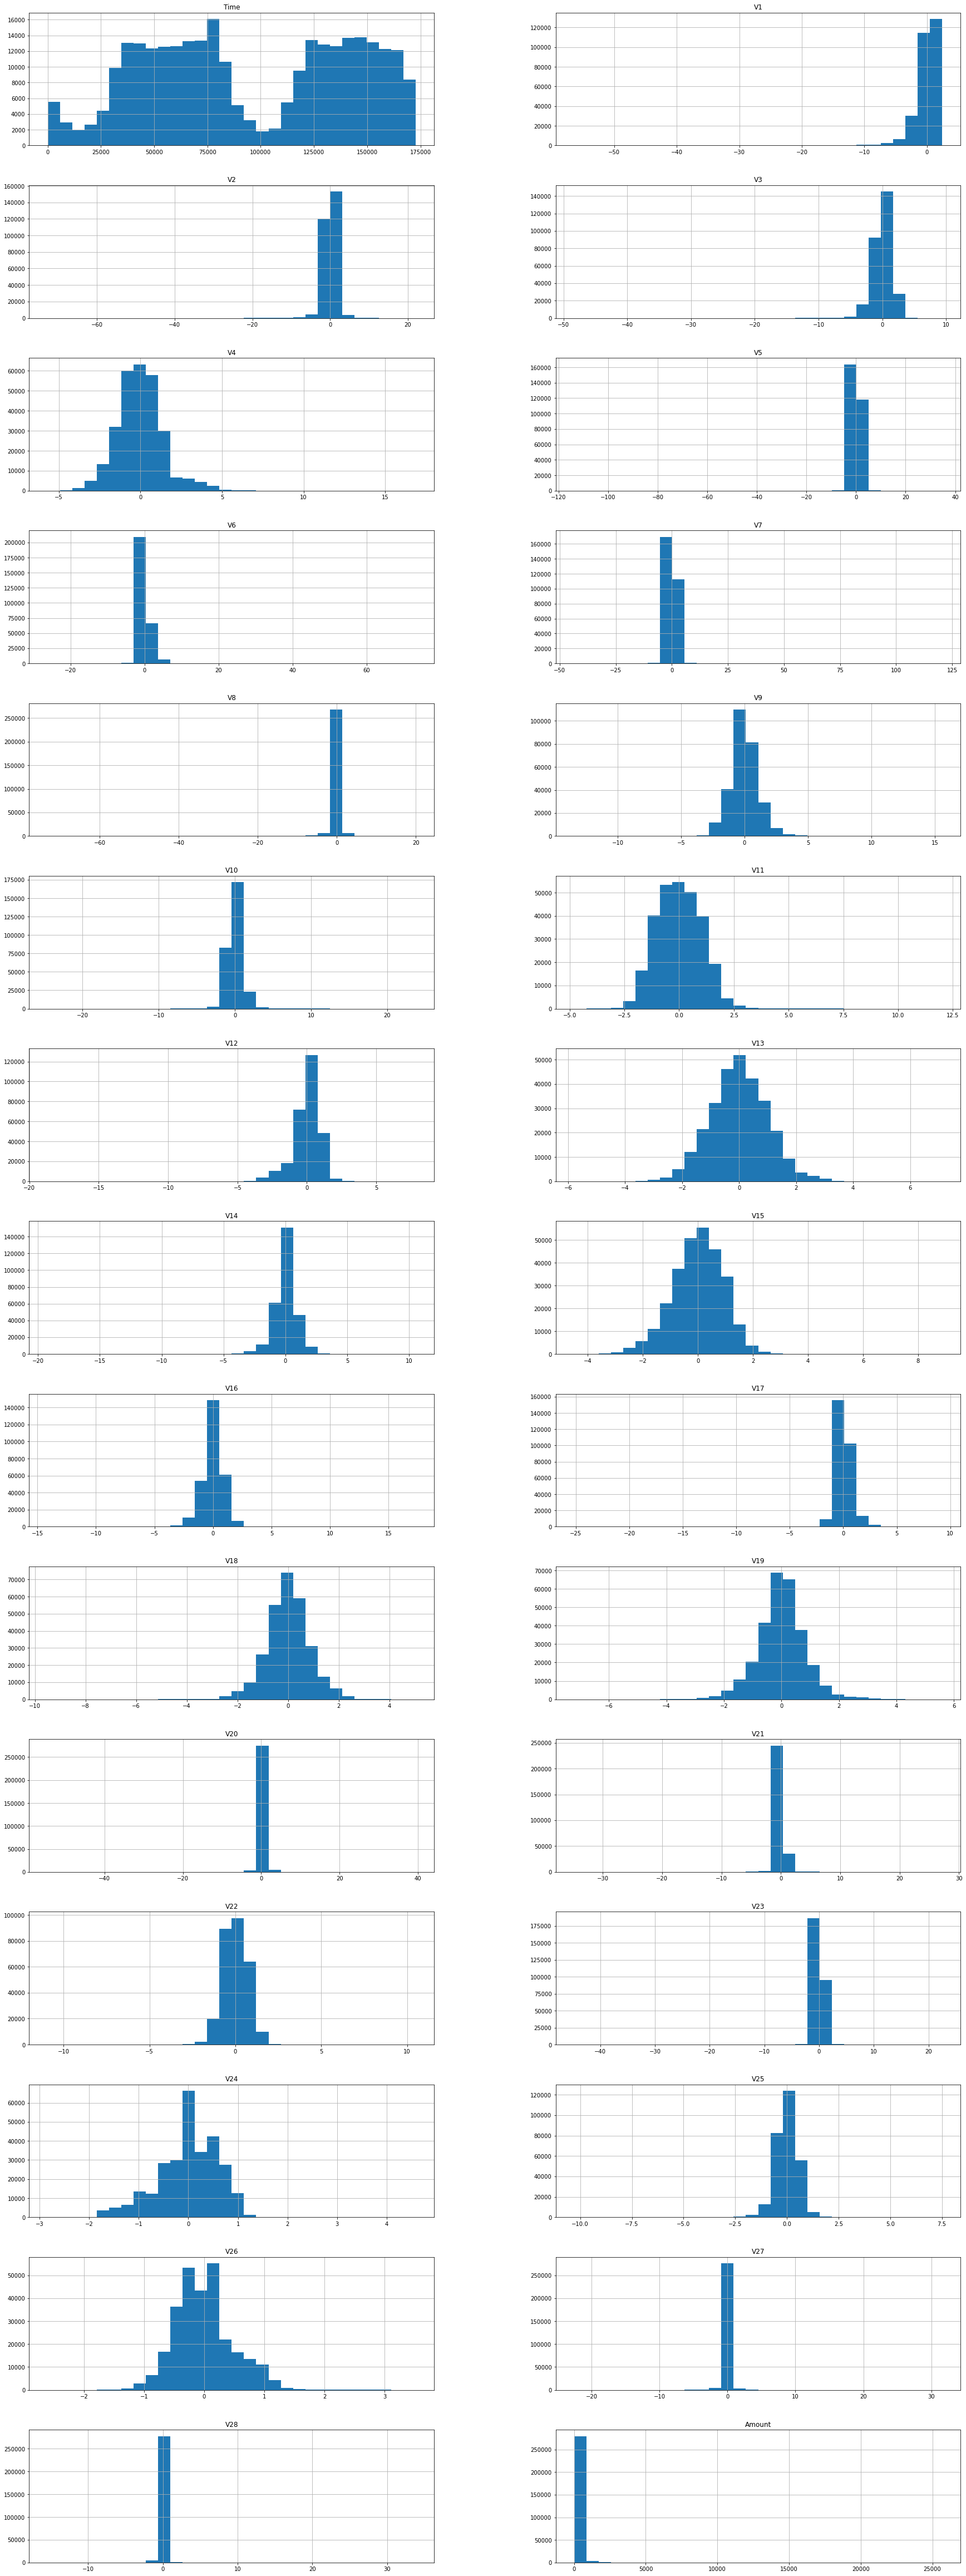

In [186]:
X.hist(figsize=(30,90),layout=(16,2),bins=30)

In [19]:
colsSkew = [i for i in X.columns if abs(X[i].skew()) > 0.30 ]
print(colsSkew)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V15', 'V16', 'V17', 'V20', 'V21', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [20]:
qt = QuantileTransformer(random_state=0, output_distribution='normal')

In [21]:
X[colsSkew]=qt.fit_transform(X[colsSkew])

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>],
       [<AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>],
       [<AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>],
       [<AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>],
       [<AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>],
       [<AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>],
       [<AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>],
       [<AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'cen

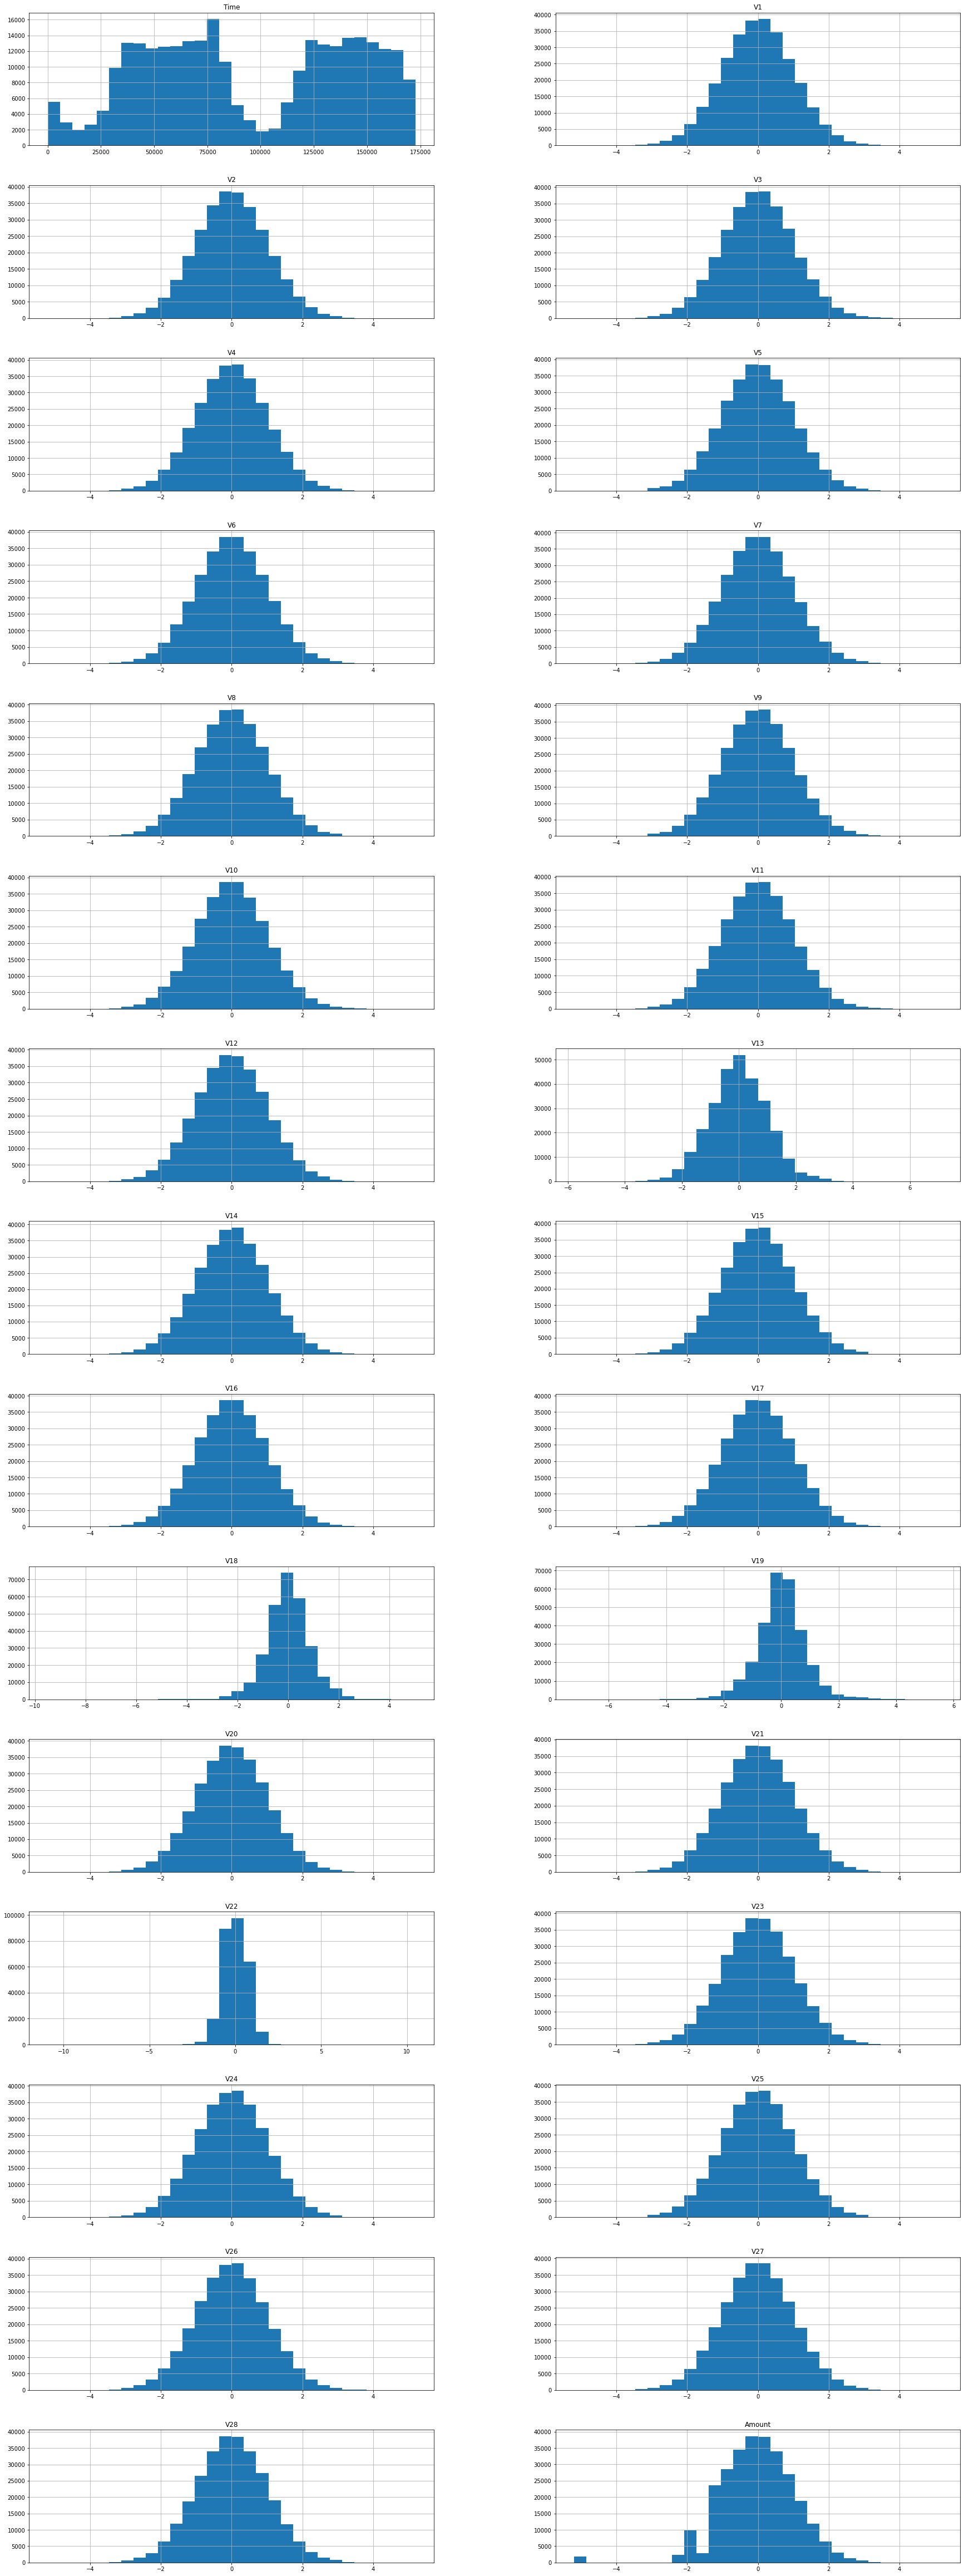

In [22]:
X.hist(figsize=(30,90),layout=(16,2),bins=30)

In [25]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,2.837260e+05,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,-0.000102,0.001295,0.002967,0.000218,-0.001246,0.002154,-0.001762,0.000328,-0.001669,...,0.001089,0.001763,-0.000015,2.193224e-03,-0.000912,-0.000427,-0.001007,-0.001905,0.005321,-0.014463
std,47481.047891,0.998017,0.997253,0.998040,0.999426,0.997437,0.997465,0.997651,0.997964,0.998943,...,0.997969,1.000256,0.724550,9.960453e-01,0.999025,0.999938,1.001176,0.999104,0.997573,1.053913
min,0.000000,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,-5.199338,-10.933144,-5.199338e+00,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,54204.750000,-0.674788,-0.672118,-0.671895,-0.674512,-0.680826,-0.672665,-0.673647,-0.674484,-0.677171,...,-0.674175,-0.678312,-0.542700,-6.726500e-01,-0.676708,-0.677322,-0.676610,-0.676507,-0.667737,-0.671455
50%,84692.500000,0.002381,-0.002070,0.003229,0.002121,-0.002375,0.000872,-0.002987,0.001765,-0.001067,...,0.000782,0.000246,0.006675,-5.720689e-07,0.001552,0.001211,-0.000928,-0.001356,0.004922,-0.001255
75%,139298.000000,0.670869,0.676194,0.676598,0.672355,0.676747,0.677600,0.667333,0.675540,0.671387,...,0.678553,0.681182,0.528245,6.732119e-01,0.673909,0.676827,0.673361,0.673410,0.682246,0.675182
max,172792.000000,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,...,5.199338,5.199338,10.503090,5.199338e+00,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


In [114]:
oversample = imblearn.over_sampling.SMOTE()

In [115]:
X, y = oversample.fit_resample(X, y)

In [116]:
y.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,stratify=y, random_state=0)
X_train.shape,X_test.shape

((453204, 30), (113302, 30))

In [34]:
std = StandardScaler()

In [118]:
X_train_scaled=std.fit_transform(X_train)
X_test_scaled=std.transform(X_test)

In [96]:
pca = PCA(n_components=0.99,svd_solver='full')

In [119]:
X_pca = pca.fit(X_train_scaled).transform(X_train_scaled)
X_pca.shape

(453204, 29)

In [269]:
pca.explained_variance_ratio_

array([0.35018376, 0.07776416, 0.06396496, 0.04413562, 0.04123403,
       0.03829198, 0.03526124, 0.03254075, 0.03195949, 0.0276261 ,
       0.02584899, 0.02236844, 0.01949975, 0.01878297, 0.01837784,
       0.01652211, 0.01528643, 0.01451465, 0.01357046, 0.01277699,
       0.01094954, 0.01005787, 0.00979332, 0.00886643, 0.00827229,
       0.00760925, 0.00728776, 0.00618549, 0.00552255])

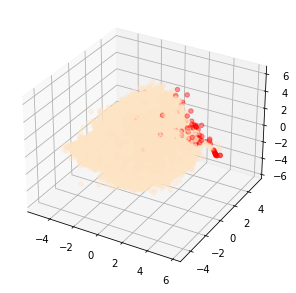

In [102]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(projection='3d')
colormap = np.array(['bisque','r'])
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,3],c=colormap[np.array(y_train)],alpha=0.4)
ax.grid()

# Random Forest Model

In [103]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [10, 20],
#     'max_features': ['auto','log2'],
#     'n_estimators': [200, 300, 400],
#     'class_weight': ['balanced_subsample']
# }

In [104]:
# rf_clf = RandomForestClassifier(criterion='entropy',oob_score=True, random_state=0)

In [40]:
rf_clf = RandomForestClassifier(n_estimators=400,max_depth=5,criterion='entropy',oob_score=True, random_state=0, 
                                class_weight="balanced_subsample")

In [107]:
# grid_search = GridSearchCV(estimator = rf_clf, param_grid=param_grid, cv = 3)

In [270]:
rf_clf.fit(X_train_scaled, y_train)
# grid_search.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', oob_score=True, random_state=0)

In [ ]:
# grid_search.best_params_

In [271]:
accuracy_score(y_test,rf_clf.predict(X_test_scaled))
# accuracy_score(y_test,grid_search.best_estimator_.predict(X_test_scaled))

0.9999382182132708

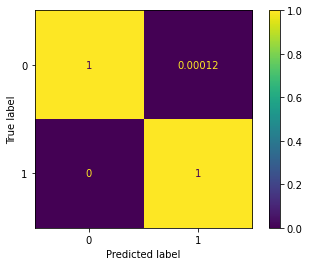

In [281]:
plot_confusion_matrix(rf_clf, X_test_scaled, y_test, normalize='true')

# XGBoost Model

In [51]:
xgb_clf = XGBClassifier(tree_method='hist',random_state=0, n_estimators=400, gamma=4, learning_rate=0.38,
                   n_jobs=-1, max_depth=4,scale_pos_weight=200,subsample=0.9)

In [278]:
xgb_clf.fit(X_train_scaled,y_train)

[12:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=4, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.38, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=200, subsample=0.9,
              tree_method='hist', validate_parameters=1, verbosity=None)

In [279]:
accuracy_score(y_test,xgb_clf.predict(X_test_scaled))

0.9995763534624279

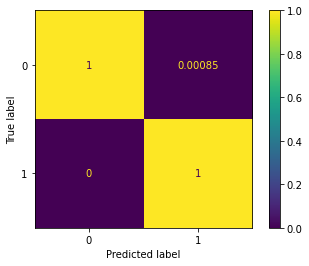

In [280]:
plot_confusion_matrix(xgb_clf, X_test_scaled, y_test, normalize='true')

# ANN model (pytorch)

In [126]:
import torch
from torch.nn import Module,Linear,Sequential,ReLU,Sigmoid,BCELoss
from torch.optim import Adam

In [202]:
class fraudDetectionNN(Module):
    def __init__(self, inpsize, hiddsize):
        super(fraudDetectionNN,self).__init__()
        self.ann = Sequential(Linear(inpsize,hiddsize),ReLU(),
                             Linear(hiddsize,hiddsize*2),ReLU(),
                             Linear(hiddsize*2,1))
    def forward(self,inp):
        out = self.ann(inp)
#         print(out)
        return Sigmoid()(out)

In [208]:
def genBatches(X, y, batchsize=5):
    batch_ls = []
#     print(len(data))
    for i in range(0,len(X),batchsize):
        start = i
        end = i+batchsize
#         print(start,end)
        batch_ls.append([torch.FloatTensor(X[start:end]),torch.FloatTensor(y[start:end])])
    return batch_ls

In [242]:
batchsize = 64
batch_train = genBatches(X_train_scaled, y_train.to_numpy(), batchsize=batchsize)
len(batch_train)

In [244]:
batch_test = genBatches(X_test_scaled, y_test.to_numpy(), batchsize=batchsize)
len(batch_test)

1771

In [259]:
def train(trainBatches, testBatches, modelInstance, criterion, optim, n_epoch):
    
    for i in range(1,n_epoch+1):
        ep_train_loss = 0
        ep_val_loss = 0
        y_pred_train = []
        y_true_train = []
        y_pred_test = []
        y_true_test = []
        for batch in trainBatches:
            optim.zero_grad()
            modelOut = modelInstance(batch[0])
            loss = criterion(modelOut, batch[1].unsqueeze(1))
            ep_train_loss += loss.item()
            y_pred_train.extend(torch.round(modelOut).squeeze(1).tolist())
            y_true_train.extend(batch[1].tolist())
            
            loss.backward()
            optim.step()

        with torch.no_grad():
            for batch in testBatches:
                modelOut = modelInstance(batch[0])
                loss = criterion(modelOut, batch[1].unsqueeze(1))
                ep_val_loss += loss.item()
                y_pred_test.extend(torch.round(modelOut).squeeze(1).tolist())
                y_true_test.extend(batch[1].tolist())

        trainAcc = accuracy_score(y_true_train,y_pred_train)
        valAcc = accuracy_score(y_true_test,y_pred_test)
        print(f'Epoch {i+0:02}: | TrainLoss: {ep_train_loss/len(trainBatches):.5f} | TrainAcc: {trainAcc:.3f} | ValLoss: {ep_val_loss/len(testBatches): .5f} | ValAcc: {valAcc: .3f}')
    
    return y_true_test, y_pred_test

In [245]:
inpsize = X_train.shape[1]
hiddsize = 64
lr = 0.001
n_epoch = 20

In [247]:
model = fraudDetectionNN(inpsize,hiddsize)
criterion = BCELoss()
optim = Adam(model.parameters(),lr=lr)

In [272]:
model

fraudDetectionNN(
  (ann): Sequential(
    (0): Linear(in_features=30, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [260]:
actuals, preds = train(batch_train, batch_test, model, criterion, optim, 5)

Epoch 01: | TrainLoss: 0.01358 | TrainAcc: 1.000 | ValLoss:  0.01011 | ValAcc:  1.000
Epoch 02: | TrainLoss: 0.01333 | TrainAcc: 1.000 | ValLoss:  0.01011 | ValAcc:  1.000
Epoch 03: | TrainLoss: 0.01355 | TrainAcc: 1.000 | ValLoss:  0.01048 | ValAcc:  1.000
Epoch 04: | TrainLoss: 0.01333 | TrainAcc: 1.000 | ValLoss:  0.01593 | ValAcc:  0.999
Epoch 05: | TrainLoss: 0.01324 | TrainAcc: 1.000 | ValLoss:  0.01034 | ValAcc:  1.000


In [263]:
print(classification_report(actuals, preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       1.00      1.00      1.00     56651

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

